In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns

# INTRODUCTION


Linear regression is a statistical method used to predict a continuous variable based on the values of one or more predictor variables. In this case, we want to predict the compressive strength of paving blocks made of sand and plastic based on the values of the following variables:

Identification_no: An identification number assigned to each paving block sample
Type_of_mould: The shape of the mould used to create the paving block (in this case, we will assume the shape is a rectangle)
Area_of_mould: The surface area of the mould used to create the paving block, in square meters
Ingredients_in_paving_sand_In_KG: The amount of sand used in creating the paving block, in kilograms
Ingredients_in_paving_plastic_%: The percentage of plastic used in creating the paving block
Load: The maximum load, in Newtons, that the paving block can bear before failure
Weight: The weight of the paving block, in kilograms
Compressive_Strength: The compressive strength of the paving block, in Megapascals (MPa)
For the purpose of this explanation, we will focus on predicting the compressive strength of paving blocks based on the amount of sand and plastic used in their production, as well as their weight and the maximum load they can bear. We will assume that the mould used to create the paving blocks is rectangular.

To perform linear regression, we first need to collect data on the variables we want to use as predictors and the variable we want to predict. We then split this data into a training set and a testing set. We use the training set to train a linear regression model, which will learn how to predict compressive strength based on the values of the predictor variables. We then evaluate the model's performance using the testing set.

In this case, we would collect data on a number of rectangular paving blocks made of sand and plastic, recording the values of the predictor variables for each block as well as their compressive strength. We would then split this data into a training set and a testing set, using the training set to train a linear regression model to predict compressive strength based on the amount of sand and plastic used, as well as the weight and maximum load of the blocks.

Once the model is trained, we can use it to predict the compressive strength of new rectangular paving blocks based on their ingredient composition, weight, and maximum load. This can help us optimize the production process by adjusting the amount of sand and plastic used in the blocks to achieve a desired compressive strength.

Note: This is a simplified explanation of linear regression and its application in civil engineering. Actual predictive models may involve more complex data preprocessing, feature selection, and model tuning to achieve optimal performance.

In [4]:
df = pd.read_csv('RECTANGLEE.csv')
df

,sr_no,Identification_no,Type_ of_mould,area _of _mould,ingridients_in_paving_sand_In_KG,ingridients_in_paving_plastic_%,Load,Weight,Compressive_Strength
0,1,R1,rectangular,29900,0.695,50.0,461,1.39,15.410
1,2,R2,rectangular,29900,1.230,60.0,190,3.87,6.534
2,3,R3,rectangular,29900,0.600,51.0,404,1.22,13.528
3,4,R4,rectangular,29900,2.040,39.0,517,3.35,17.290
4,5,R5,rectangular,29900,1.760,49.0,170,3.46,5.350
5,6,R6,rectangular,29900,0.532,56.0,220,1.21,7.358
6,7,R7,rectangular,29900,0.890,45.0,250,1.75,8.360
7,8,R8,rectangular,29900,1.530,62.0,372,2.93,12.440
8,9,R9,rectangular,29900,0.720,54.0,491,1.58,16.420
9,10,R10,rectangular,29900,1.890,47.0,193,3.67,6.450


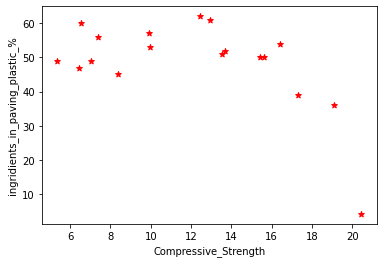

In [8]:
%matplotlib inline
plt.xlabel('Compressive_Strength')
plt.ylabel('ingridients_in_paving_plastic_%')
plt.scatter(df.Compressive_Strength, df.ingridients_in_paving_plastic_, color='red', marker='*')


In [5]:
print(df.columns)

Index(['sr_no', 'Identification_no', 'Type_ of_mould ', 'area _of _mould',
       'ingridients_in_paving_sand_In_KG', 'ingridients_in_paving_plastic_%',
       'Load', 'Weight ', 'Compressive_Strength'],
      dtype='object')


In [6]:

# update the column name 'B' to 'C'
df = df.rename(columns={'ingridients_in_paving_plastic_%': 'ingridients_in_paving_plastic_'})

# display the updated column names
print(df.columns)


Index(['sr_no', 'Identification_no', 'Type_ of_mould ', 'area _of _mould',
       'ingridients_in_paving_sand_In_KG', 'ingridients_in_paving_plastic_',
       'Load', 'Weight ', 'Compressive_Strength'],
      dtype='object')


In [7]:
df

,sr_no,Identification_no,Type_ of_mould,area _of _mould,ingridients_in_paving_sand_In_KG,ingridients_in_paving_plastic_,Load,Weight,Compressive_Strength
0,1,R1,rectangular,29900,0.695,50.0,461,1.39,15.410
1,2,R2,rectangular,29900,1.230,60.0,190,3.87,6.534
2,3,R3,rectangular,29900,0.600,51.0,404,1.22,13.528
3,4,R4,rectangular,29900,2.040,39.0,517,3.35,17.290
4,5,R5,rectangular,29900,1.760,49.0,170,3.46,5.350
5,6,R6,rectangular,29900,0.532,56.0,220,1.21,7.358
6,7,R7,rectangular,29900,0.890,45.0,250,1.75,8.360
7,8,R8,rectangular,29900,1.530,62.0,372,2.93,12.440
8,9,R9,rectangular,29900,0.720,54.0,491,1.58,16.420
9,10,R10,rectangular,29900,1.890,47.0,193,3.67,6.450


In [9]:
new_df = df[[ 'ingridients_in_paving_plastic_', 'Compressive_Strength']]

In [10]:
new_df

,ingridients_in_paving_plastic_,Compressive_Strength
0,50.0,15.410
1,60.0,6.534
2,51.0,13.528
3,39.0,17.290
4,49.0,5.350
5,56.0,7.358
6,45.0,8.360
7,62.0,12.440
8,54.0,16.420
9,47.0,6.450


In [11]:
n_df = new_df.drop('ingridients_in_paving_plastic_',axis='columns')
n_df

,Compressive_Strength
0,15.410
1,6.534
2,13.528
3,17.290
4,5.350
5,7.358
6,8.360
7,12.440
8,16.420
9,6.450


In [14]:
ingridients_in_paving_plastic_ = df.ingridients_in_paving_plastic_
ingridients_in_paving_plastic_


0     50.0
1     60.0
2     51.0
3     39.0
4     49.0
5     56.0
6     45.0
7     62.0
8     54.0
9     47.0
10    52.0
11    57.0
12    36.0
13    49.0
14    50.0
15    61.0
16    53.0
17     4.2
Name: ingridients_in_paving_plastic_, dtype: float64

In [15]:
df = df.drop(3)


In [16]:
# Create linear regression object
reg = linear_model.LinearRegression()
reg.fit(n_df,ingridients_in_paving_plastic_)

LinearRegression()

In [17]:
Compressive_Strength=reg.predict([[30]])
Compressive_Strength

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([21.72564225])

In [18]:
reg.coef_

array([-1.50269551])

In [19]:
reg.intercept_

66.80650755773355

In [20]:
50*-1.26091066+63.55929799792155

0.5137649979215482

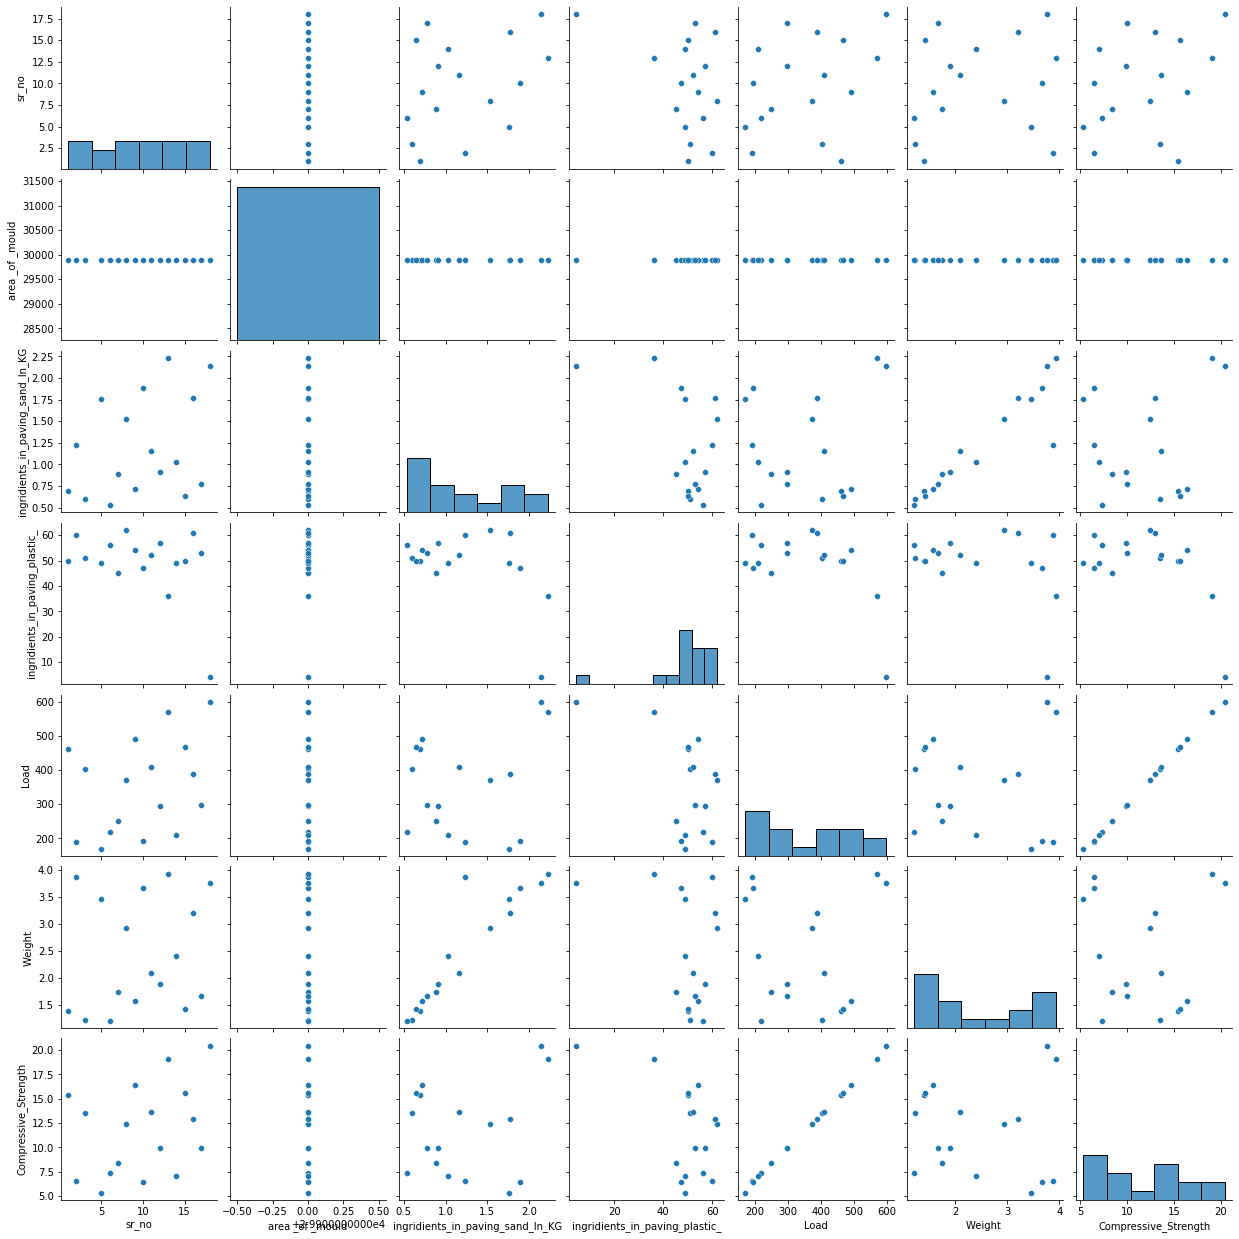

In [21]:
sns.pairplot(data = df) 